In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [54]:
x = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
y = [7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2]

x_squared = []
x_times_y = []
x_squared_times_y = []


In [56]:
for xi, yi in zip(x, y):
    xsq = xi**2
    xy = xi * yi
    x2y = xsq * yi

    x_squared.append(xsq)
    x_times_y.append(xy)
    x_squared_times_y.append(x2y)

In [58]:
print(f"Fertilizer kg(xᵢ) | Potatoes t(yᵢ) |{" "*3} xᵢ² {" "*2} |{" "*3} xᵢ·yᵢ{" "*2} | {" "*3}ᵢ²·yᵢ ")

for i in range(len(x)):

    print(f"{" "*6}x={x[i]:>3}{" "*6} |{" "*5}y={y[i]:>4}{" "*4} | x²={x_squared[i]:>6} | x·y={x_times_y[i]:>6.1f} | x²·y={x_squared_times_y[i]:>8.1f}")

Fertilizer kg(xᵢ) | Potatoes t(yᵢ) |    xᵢ²    |    xᵢ·yᵢ   |    ᵢ²·yᵢ 
      x= 50       |     y= 7.5     | x²=  2500 | x·y= 375.0 | x²·y= 18750.0
      x=100       |     y=10.2     | x²= 10000 | x·y=1020.0 | x²·y=102000.0
      x=150       |     y=12.8     | x²= 22500 | x·y=1920.0 | x²·y=288000.0
      x=200       |     y=14.5     | x²= 40000 | x·y=2900.0 | x²·y=580000.0
      x=250       |     y=15.6     | x²= 62500 | x·y=3900.0 | x²·y=975000.0
      x=300       |     y=16.0     | x²= 90000 | x·y=4800.0 | x²·y=1440000.0
      x=350       |     y=15.8     | x²=122500 | x·y=5530.0 | x²·y=1935500.0
      x=400       |     y=15.0     | x²=160000 | x·y=6000.0 | x²·y=2400000.0
      x=450       |     y=13.5     | x²=202500 | x·y=6075.0 | x²·y=2733750.0
      x=500       |     y=11.2     | x²=250000 | x·y=5600.0 | x²·y=2800000.0


In [9]:
x_np = np.array(x).reshape(-1, 1)
y_np = np.array(y)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_np)

model = LinearRegression()
model.fit(x_poly, y_np)

LinearRegression()

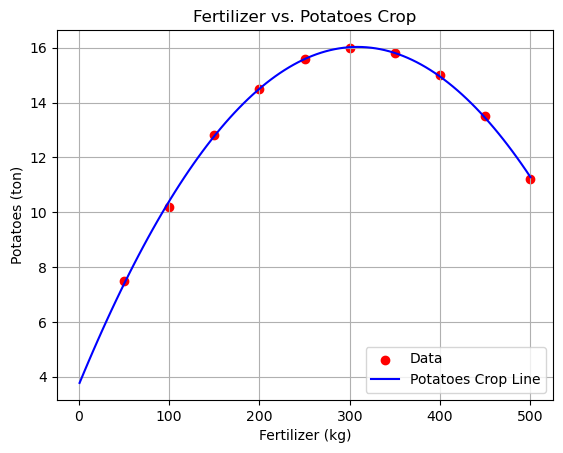

In [11]:
plt.scatter(x, y, color='red', label='Data')
x_line = np.linspace(1, 500, 100).reshape(-1, 1)
x_line_poly = poly.transform(x_line)
y_line = model.predict(x_line_poly)

plt.plot(x_line, y_line, color='blue', label='Potatoes Crop Line')
plt.xlabel('Fertilizer (kg)')
plt.ylabel("Potatoes (ton)" )
plt.title('Fertilizer vs. Potatoes Crop')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [74]:
a = model.intercept_ 
b = model.coef_[1]
c = model.coef_[2]

In [17]:
optimal_x =  -b / (2*c)

In [62]:
print(f'Optimal fertilizer quantity: {optimal_x:.2f}kg')

Optimal fertilizer quantity: 308.54kg


In [114]:
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')
print()
print('Optimal x equasion:')
print(" x = -b / (2c) ")
print()
print("The Polynomial line's equasion is: y = a + b·x + c·x²  =>")
print(f'y = {a:.3f} + {b:.5f}x + {c:.7f}x²')
print("Therefore, to calculate the max crop we're expecting this year, we should substitute optimal_x (AKA x_max) into the equation to find y_max:")
print()
max_y = a + b*optimal_x + c*(optimal_x**2)
print(f'max_y = {a:.3f} + {b:.5f} * {optimal_x:.2f} + ({c:.7f} * {optimal_x **2})')
print(f'max crop expected (max_y) = {max_y:.2f} ton')

a = 3.6950000000004195
b = 0.0799409090908985
c = -0.00012954545454542865

Optimal x equasion:
 x = -b / (2c) 

The Polynomial line's equasion is: y = a + b·x + c·x²  =>
y = 3.695 + 0.07994x + -0.0001295x²
Therefore, to calculate the max crop we're expecting this year, we should substitute optimal_x (AKA x_max) into the equation to find y_max:

max_y = 3.695 + 0.07994 * 308.54 + (-0.0001295 * 95199.31332719042)
max crop expected (max_y) = 16.03 ton
